# Hands-On scikit-learn Tutorial: Getting Started with Machine Learning

![Python Logo](https://www.analyticsvidhya.com/wp-content/uploads/2015/01/scikit-learn-logo.png)

## Introduction

Scikit-learn, also known as sklearn, is a popular and widely-used open-source machine learning library in Python. This library provides a robust set of tools for various machine learning tasks, including supervised and unsupervised learning which are a central focus of this tutorial. Scikit-learn is built on top of other scientific computing libraries like NumPy and SciPy, making it a powerful and efficient choice for data scientists and machine learning practitioners.

The primary goal of scikit-learn is to simplify the process of applying machine learning algorithms to real-world data. It offers a user-friendly interface for working with data, creating machine learning models, and evaluating their performance. The library supports a broad range of algorithms, from traditional statistical methods to cutting-edge machine learning techniques, making it suitable for both beginners and experienced researchers.

The purpose of this tutorial is to provide a high-level overview of supervised and unsupervised learning and describe how to utilize scikit-learn to build machine learning models tailored for these specific tasks. By the end of this tutorial, you will have a solid understanding of the key concepts, methods, and techniques required to effectively leverage scikit-learn for creating powerful and accurate machine learning models in both supervised and unsupervised settings. 

## Supervised Learning

- Add high level description

- Add description that involves basic notation

- Transition to the example


- Introduce a dataset, what are the labels and what features do we have

- Explain how the data is stored

- Visualize the dataset

### Simple Example: Linear Regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to  (x,y)  data. We will use the following simple data for our regression example (see the following figure):

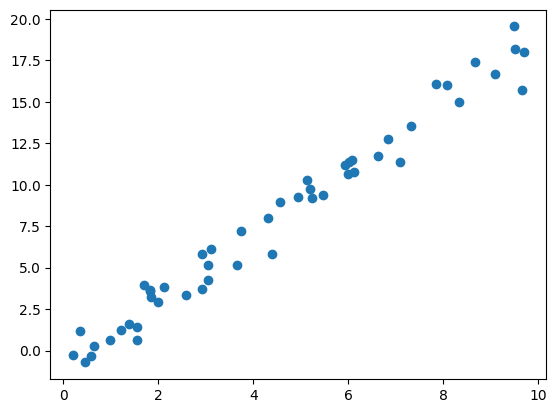

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple `LinearRegression` model, we can import the linear regression class:

In [5]:
from sklearn.linear_model import LinearRegression


Note that other more general linear regression models exist as well; you can read more about them in the [`sklearn.linear_model` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
We will explore how you can quantitatively choose hyperparameters in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb).

For our linear regression example, we can instantiate the `LinearRegression` class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is storing the hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector

Previously we examined the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here our target variable `y` is already in the correct form (a length-`n_samples` array), but we need to massage the data `x` to make it a matrix of size `[n_samples, n_features]`.
In this case, this amounts to a simple reshaping of the one-dimensional array:

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to the data

Now it is time to apply our model to the data.
This can be done with the `fit` method of the model:

In [14]:
model.fit(X, y)


LinearRegression()

This fit command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit process have trailing underscores; for example in this linear model, we have the following:

In [15]:
model.coef_

array([1.9776566])

In [16]:
model.intercept_

-0.9033107255311146

These two parameters represent the slope and intercept of the simple linear fit
to the data.
Comparing the results to the data definition, we see that they are close to the values used to generate the data: a slope of 2 and intercept of –1.

One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning instead focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [`statsmodels` Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [19]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [20]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit (see the following figure):

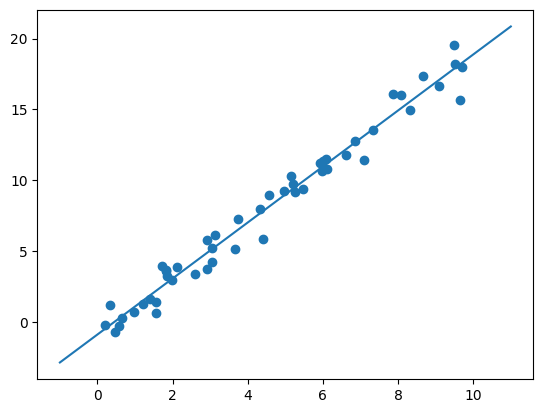

In [22]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example.

#### Evaluating the Performance of a Model

add high level description, maybe note that this can look very different depending on the task 

### Activity: Let's Tryout Some of these Methods with a New Dataset

- This is actually going to be an exercise

- One idea would to choose a data set that has multiple features and have the students trying fit a linear regression model only using one features at time. 

- The goal here would be to see what features give you the best evaluation results. 

- In addition, they can try tuning the hyperparameters to see how they affect the performance

- Discuss what are the shortcomings of this model? Some responses might be that we're only considering one feature at a time, this is a linear model so maybe a nonlinear model would be better.

## Unsupervised Learning

- Add high level description

- What are some concrete examples of models that you might use, maybe add a couple pics to keep it high level

- Introduce K means

### Simple Example: K-Means Clustering

- Introduce the notion of clustering
- Describe how K-Means works

#### Load and Visualize the Dataset

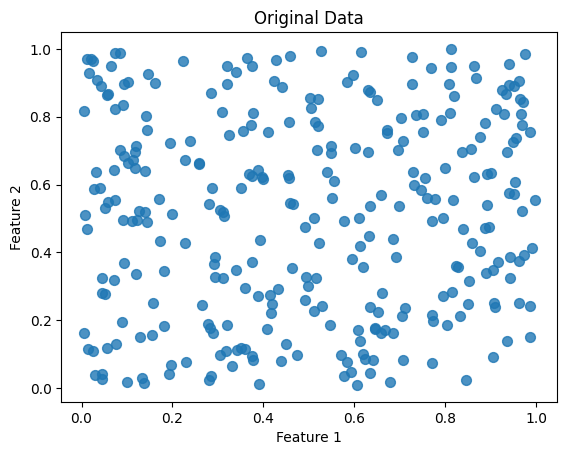

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)
n_samples = 300
X = np.random.rand(n_samples, 2)

plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Fit the Model to the Dataset

- There's a lot of models to choose from https://scikit-learn.org/stable/unsupervised_learning.html
- Introduce kmeans

In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

#### Visualize the Clustering 

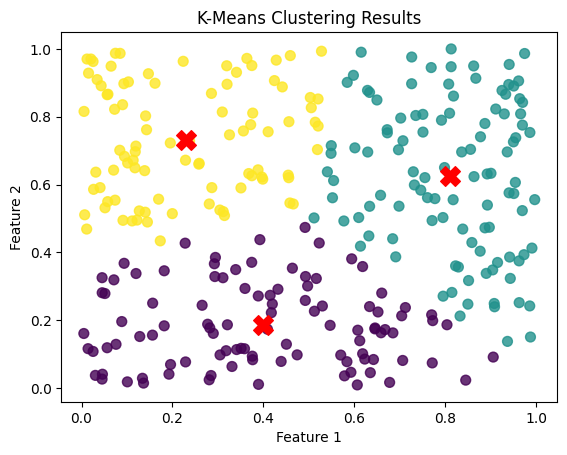

In [4]:
# Coordinates of cluster centers
centers = kmeans.cluster_centers_

# Cluster assignments for each data point
labels = kmeans.labels_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
### Evaluating the Performance of the Model

In [6]:
new_data = np.array([[0.2, 0.8], [0.6, 0.2]])
predicted_labels = kmeans.predict(new_data)
print("Predicted labels for new data:", predicted_labels)

Predicted labels for new data: [2 0]


#### What are the Shortcomings of this Model?

### Activity: Let's Try A Different Model

Choose something from https://scikit-learn.org/stable/unsupervised_learning.html